<a href="https://colab.research.google.com/github/HumbertoSM-DataScience/TopologyOptimization/blob/main/Redes_Neurais_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar bibliotecas
import os
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import pandas as pd
from tqdm.notebook import trange, tqdm
import matplotlib.ticker as ticker

path_dados = '/content/drive/MyDrive/Redes Neurais - FIS 493/Dadosg2/Dadosg2/'
path_sup = '/content/drive/MyDrive/Redes Neurais - FIS 493/DadosTestes/'

In [ ]:
#Extrai os arquivos do Drive
!pip install -q pyunpack
!pip install -q patool
from pyunpack import Archive
Archive("/content/drive/MyDrive/Redes Neurais - FIS 493/Dadosg2.rar").extractall("/content")

     |████████████████████████████████| 77 kB 2.9 MB/s 


In [ ]:
#Atualiza arquivo lista_nomes
path_dados = '/content/drive/MyDrive/Redes Neurais - FIS 493/Dadosg2/Dadosg2/'
path_sup = '/content/drive/MyDrive/Redes Neurais - FIS 493/DadosTestes/'
nomes_files = [f for f in os.listdir(path_dados) if f.endswith('comp.mat')]

with open(path_sup+"lista_nomes.json", 'w') as ar:
 json.dump(nomes_files, ar, indent=1,) 


In [ ]:
# Faz um dataset de X e y para um k e um condicionamento de compliance

path_dados = "/content/Dadosg2/"
path_sup = '/content/drive/MyDrive/Redes Neurais - FIS 493/DadosTestes/'
with open(path_sup+"lista_nomes.json", 'r') as ar:
  nomes_files = json.load(ar)


n=10000
iteracao = 10 
dados = np.zeros((2,n,40,40), dtype=float)
nome = 'dados_teste_gradcomp_clip5mean_int10.npy'

for i in tqdm(range(n)):
  filename = nomes_files[i]
  path_comp = path_dados+filename
  path_mat = path_dados+filename.replace('comp.mat','mat.mat')
  data_mat  = np.array(list(spio.loadmat(path_mat).items()))[3,1]
  data_comp  = np.array(list(spio.loadmat(path_comp).items()))[3,1]
  #dados[0][i] = data_comp[iteracao]/np.max(data_comp[iteracao])
  # clip = np.max(data_comp[iteracao])/30
  clip = np.median(data_comp[iteracao])*5
  dados[0][i] = np.where(data_comp[iteracao]<=clip,data_comp[iteracao]/clip,1)
  # dados[0][i] = np.sqrt(np.sum(np.square(np.gradient(dados[0][i])),axis=0))
  dados[1][i] = data_mat[-1]
  if (i*100/n)%1==0:
     print(i*100/n)

np.save(path_sup+nome,dados)


In [ ]:
# Faz vários datasets de X e y para multiplos k e um condicionamento de compliance
for k in tqdm((0,2,5,10,22,35,51)):
  n=10000
  dados = np.zeros((2,n,40,40), dtype=float)
  nome = f'dados_gradcomp_clip5mean_int{k}.npy'

  for i in tqdm(range(n)):
    filename = nomes_files[i]
    path_comp = path_dados+filename
    path_mat = path_dados+filename.replace('comp.mat','mat.mat')
    data_mat  = np.array(list(spio.loadmat(path_mat).items()))[3,1]
    data_comp  = np.array(list(spio.loadmat(path_comp).items()))[3,1]
    #dados[0][i] = data_comp[k]/np.max(data_comp[k])
    # clip = np.max(data_comp[k])/30
    clip = np.median(data_comp[k])*5
    dados[0][i] = np.where(data_comp[k]<=clip,data_comp[k]/clip,1)
    dados[0][i] = np.sqrt(np.sum(np.square(np.gradient(dados[0][i])),axis=0))
    dados[1][i] = data_mat[-1]
  np.save(path_sup+nome,dados)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
dados = np.load(path_sup+'dados_comp_clip5mean_int35.npy')

In [ ]:
dados = np.load(path_sup+'dados_teste_comp_maxindividual_int5.npy')

In [ ]:
dados = np.load(path_sup+'dados_teste_comp_clip30max_int5.npy')

In [ ]:
dados = np.load(path_sup+'dados_teste_gradcomp_clip5mean_int5.npy')

In [ ]:
dados[0][2].max()

0.7068090987882905

In [ ]:
np.ones(len(dados[0].flatten())) / len(dados[0].flatten())

array([6.25e-08, 6.25e-08, 6.25e-08, ..., 6.25e-08, 6.25e-08, 6.25e-08])

[[<matplotlib.axis.YTick at 0x7f006a6b12d0>,

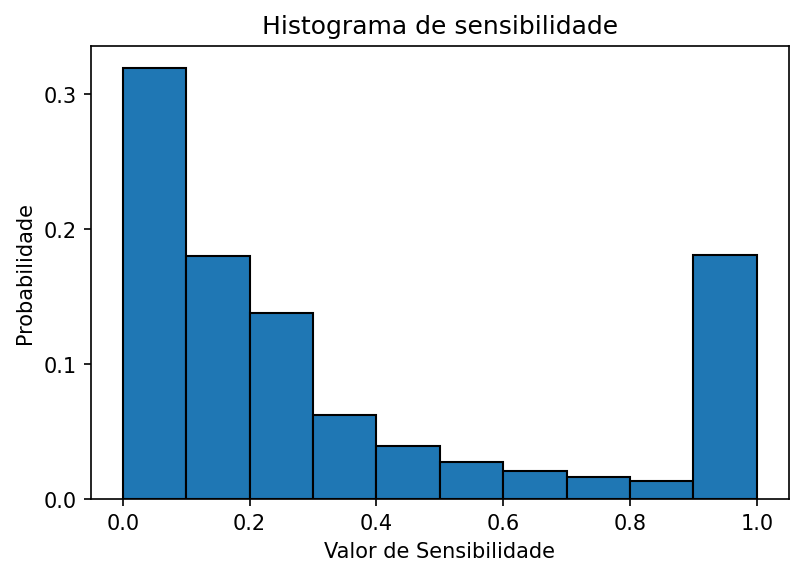

In [ ]:
#Plota a densidade de sensibilidade
fig,ax = plt.subplots(1,1, figsize=(6,4), dpi = 150)
ax.hist(dados[0].flatten(), bins=10,edgecolor='black',weights=np.ones(len(dados[0].flatten())) / len(dados[0].flatten()))
ax.set(title="Histograma de sensibilidade",xlabel="Valor de Sensibilidade",ylabel="Probabilidade")
ax.set(yticks=np.arange(0,.4,0.1))
#ax.yaxis.set_major_formatter(PercentFormatter(1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(dados[0].flatten())))

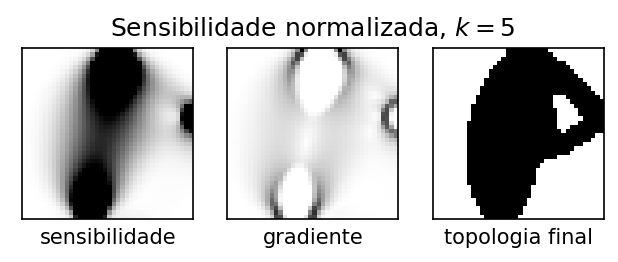

In [ ]:
dados1 = np.load(path_sup+'dados_comp_clip5mean_int5.npy')
dados2 = np.load(path_sup+'dados_gradcomp_clip5mean_int5.npy')
i = 1

fig,ax = plt.subplots(1,3, figsize=(5,2), dpi=150)
ax[1].set(title="Sensibilidade normalizada, $k=5$")
ax[0].set(xticks=[] , yticks=[], xlabel="sensibilidade")
ax[0].imshow(dados1[0][i],cmap='gray_r')
ax[1].set(xticks=[] , yticks=[], xlabel='gradiente')
ax[1].imshow(dados2[0][i],cmap='gray_r')
ax[2].set(xticks=[] , yticks=[], xlabel='topologia final')
ax[2].imshow(dados1[1][i],cmap='gray_r')


In [ ]:
# Calcula algumas métricas do dataset

path_dados = "/content/Dadosg2/"
path_sup = '/content/drive/MyDrive/Redes Neurais - FIS 493/DadosTestes/'
with open(path_sup+"lista_nomes.json", 'r') as ar:
  nomes_files = json.load(ar)


n=10000
iteracao = 5 
metricas = np.zeros((2,n,1000), dtype=float)
finais = []
nome = 'dados_teste_comp_clip30max_int5.npy'

for i in tqdm(range(n)):
  filename = nomes_files[i]
  path_comp = path_dados+filename
  path_mat = path_dados+filename.replace('comp.mat','mat.mat')
  data_mat  = np.array(list(spio.loadmat(path_mat).items()))[3,1]
  data_comp  = np.array(list(spio.loadmat(path_comp).items()))[3,1]
  finais.append(data_mat.shape[0])
  for f in range(data_mat.shape[0]):
    metricas[0][i][f] = np.sum(data_mat[f],axis=(0,1))/1600
  for f in range(data_comp.shape[0]):
    metricas[1][i][f] = np.sum(data_comp[f],axis=(0,1))/1600

  0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


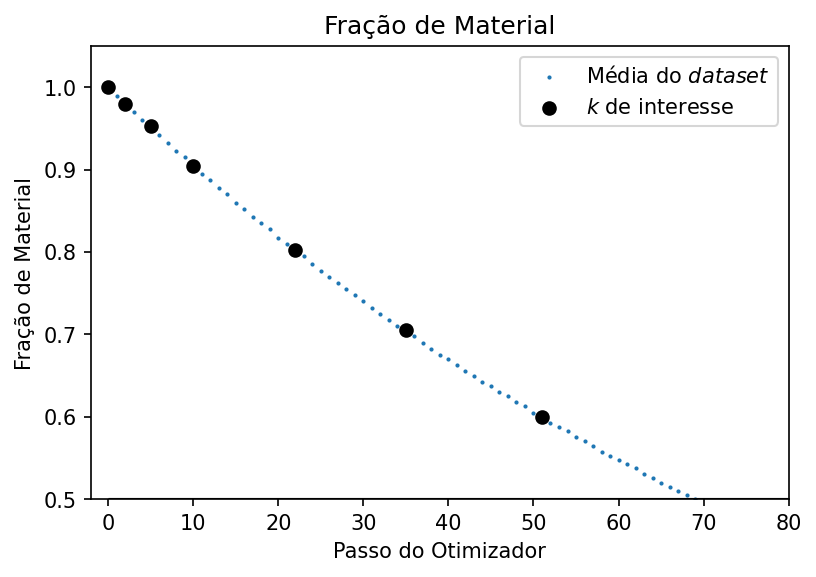

In [ ]:
# Plota a fração de material por iteração
ax,fig = plt.subplots(1,1, figsize=(6,4), dpi = 150)
plt.scatter(range(0,1000),np.sum(metricas[0]/n,axis=0), s=1,label = "Média do $\it{dataset}$")
plt.title("Fração de Material")
plt.xlabel("Passo do Otimizador")
plt.ylabel("Fração de Material")
plt.xlim(-2,80)
plt.ylim(0.5,1.05)
plt.hlines(0.5, 0,100)
plt.scatter((0,2,5,10,22,35,51), (1.00000,0.98000,0.95250,0.90500,0.80250,0.70500,0.60000), c ='black', label="$\it{k}$ de interesse")
plt.legend()

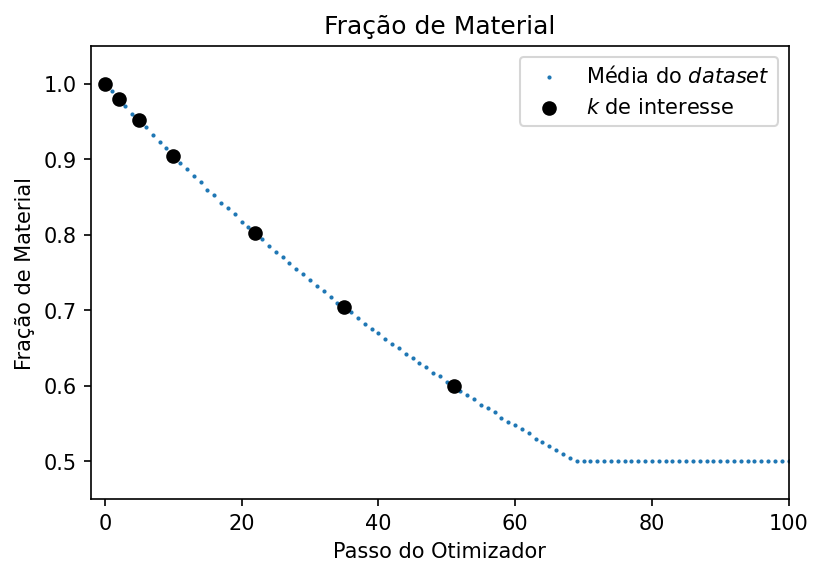

In [ ]:
# Plota a fração de material por iteração
ax,fig = plt.subplots(1,1, figsize=(6,4), dpi = 150)
plt.scatter(range(0,1000),(metricas[0][3]), s=1,label = "Média do $\it{dataset}$")
plt.title("Fração de Material")
plt.xlabel("Passo do Otimizador")
plt.ylabel("Fração de Material")
plt.xlim(-2,100)
plt.ylim(0.45,1.05)

plt.scatter((0,2,5,10,22,35,51), (1.00000,0.98000,0.95250,0.90500,0.80250,0.70500,0.60000), c ='black', label="$\it{k}$ de interesse")
plt.legend()

In [ ]:
for i,j in enumerate(np.sum(metricas[0], axis=0)/n):
  print (i,f"{j:.5f}")

In [ ]:
for i,j in enumerate(metricas[0][1]):
  print (i,f"{j:.5f}")

In [ ]:
for i in range(len(finais)):
  finais[i] = finais[i]*500

In [ ]:
np.mean(finais)

86.9083

(70.0, 120.0)

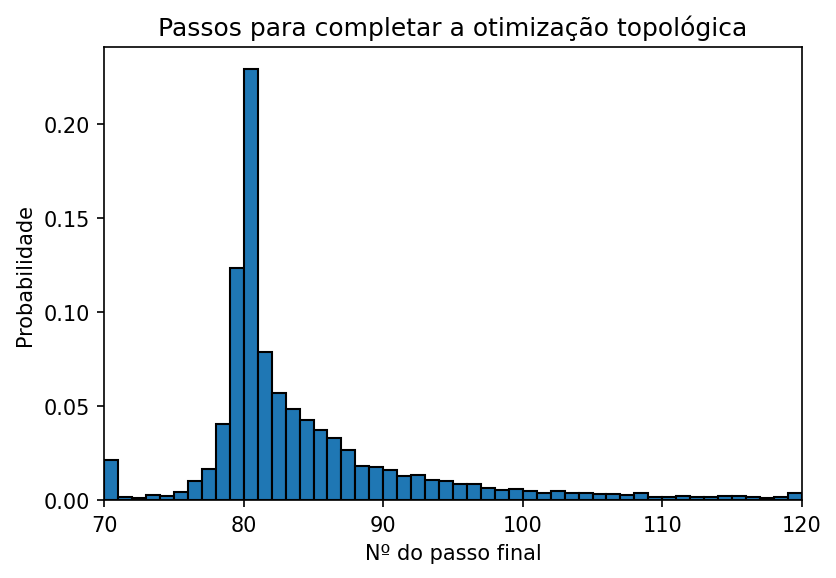

In [ ]:
#Plota a densidadde de passos necessários para finalizar a otimização
fig,ax = plt.subplots(1,1, figsize=(6,4), dpi = 150)
ax.hist(finais, bins=50,edgecolor='black',weights=np.ones(len(finais)) / len(finais), range=(70,120))
ax.set(title="Passos para completar a otimização topológica",xlabel="Nº do passo final",ylabel="Probabilidade")
#ax.set(yticks=np.arange(0,.4,0.1))

plt.xlim(70,120)



In [ ]:
a = pd.read_csv("/content/drive/MyDrive/Redes Neurais - FIS 493/Redes treinadas/resultados.txt",header=0,sep=',',names=range(11))
c = a.iloc[13:27,2:5]
c[2] = c[2].str.replace("teste: ","")
c[3] = c[3].str.replace("IOU: ","").astype(float)
c[4] = c[4].str.replace("ACC: ","").astype(float)
c.columns=[0,1,2]

b = pd.read_csv("/content/drive/MyDrive/Redes Neurais - FIS 493/Redes treinadas/dados.txt",header=None,sep=',')

b = b.drop(index=[21,50,51])

In [ ]:
d = pd.concat([c,b], ignore_index=True)
d.columns=[0,"IOU","ACC"]
dd = d[0].str.split("_",expand=True)
dd.columns=[0,"n_treino","tipo",'k']
dd = dd.drop(0,axis=1)
d = d.drop(columns=[0])
d = d.join(dd)
d = d[["n_treino","tipo","k","IOU","ACC"]]
d["k"] = d["k"].str.replace("int","").astype(int)
d["n_treino"] = d["n_treino"].astype(int)

In [ ]:
d.groupby(['tipo','k']).count().reset_index()['n_treino']

0     3
1     2
2     2
3     2
4     2
5     2
6     2
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    4
15    4
16    4
17    4
18    4
19    4
20    4
21    1
22    1
23    1
24    1
25    1
26    1
27    1
Name: n_treino, dtype: int64

In [ ]:
medias=d.groupby(['tipo','k']).mean().reset_index()
erros = d.groupby(['tipo','k']).sem().reset_index().drop(columns=["tipo","k",'n_treino'])
medias = medias.join(erros,rsuffix="_err")
medias['count'] = d.groupby(['tipo','k']).count().reset_index()['n_treino']
medias["IOU_pct"] = medias["IOU_err"]/medias['IOU']
medias["ACC_pct"] = medias["ACC_err"]/medias['ACC']
medias['fracao'] = [1.00000,0.98000,0.95250,0.90500,0.80250,0.70500,0.60000]*4

In [ ]:
medias

,tipo,k,n_treino,IOU,ACC,IOU_err,ACC_err,count,IOU_pct,ACC_pct,fracao
0,2chan,0,8.333333,0.852880,0.920599,0.000253,0.000147,3,0.000296,0.000160,1.0000
1,2chan,2,8.500000,0.852277,0.920248,0.000098,0.000057,2,0.000115,0.000062,0.9800
2,2chan,5,8.500000,0.854179,0.921356,0.000589,0.000343,2,0.000689,0.000372,0.9525
3,2chan,10,8.500000,0.853470,0.920943,0.000617,0.000359,2,0.000723,0.000390,0.9050
4,2chan,22,8.500000,0.863571,0.926792,0.000873,0.000503,2,0.001011,0.000543,0.8025
5,2chan,35,8.500000,0.881422,0.936974,0.000536,0.000303,2,0.000608,0.000323,0.7050
6,2chan,51,8.500000,0.913504,0.954797,0.000209,0.000114,2,0.000229,0.000119,0.6000
7,comp,0,3.400000,0.853300,0.920844,0.000222,0.000129,5,0.000260,0.000140,1.0000
8,comp,2,3.400000,0.853266,0.920824,0.000370,0.000216,5,0.000434,0.000234,0.9800
9,comp,5,3.400000,0.852978,0.920656,0.000359,0.000209,5,0.000421,0.000227,0.9525


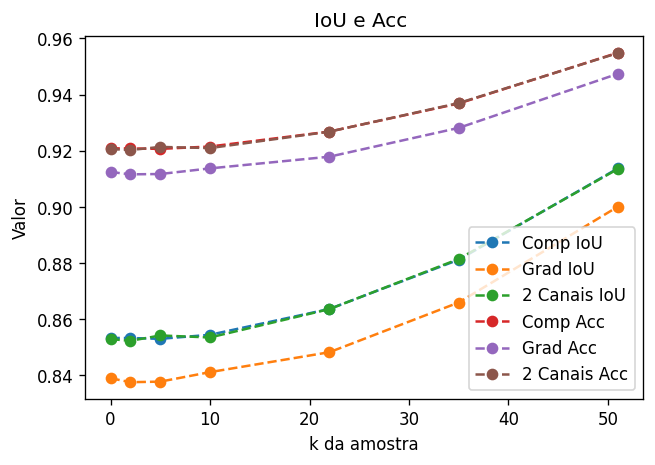

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,4),dpi=120)
ax.set(title="IoU e Acc ",xlabel="k da amostra", ylabel="Valor")
ax.plot(medias[medias['tipo']=='comp']['k'],medias[medias['tipo']=='comp']['IOU'],'--o',label="Comp IoU")
ax.plot(medias[medias['tipo']=='gradcomp']['k'],medias[medias['tipo']=='gradcomp']['IOU'],'--o',label="Grad IoU")
ax.plot(medias[medias['tipo']=='2chan']['k'],medias[medias['tipo']=='2chan']['IOU'],'--o',label="2 Canais IoU")
ax.plot(medias[medias['tipo']=='comp']['k'],medias[medias['tipo']=='comp']['ACC'],'--o',label="Comp Acc")
ax.plot(medias[medias['tipo']=='gradcomp']['k'],medias[medias['tipo']=='gradcomp']['ACC'],'--o',label="Grad Acc")
ax.plot(medias[medias['tipo']=='2chan']['k'],medias[medias['tipo']=='2chan']['ACC'],'--o',label="2 Canais Acc")
ax.legend(loc="lower right")

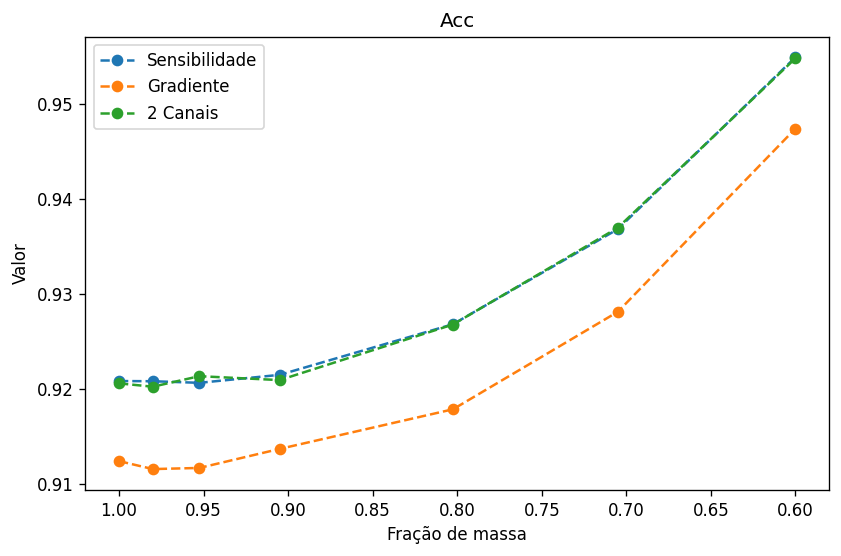

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=120)
ax.set(title="Acc",xlabel="Fração de massa", ylabel="Valor")
ax.invert_xaxis()
# ax.plot(medias[medias['tipo']=='comp']['fracao'],medias[medias['tipo']=='comp']['IOU'],'--o',label="Sensibilidade")
# ax.plot(medias[medias['tipo']=='gradcomp']['fracao'],medias[medias['tipo']=='gradcomp']['IOU'],'--o',label="Gradiente")
# ax.plot(medias[medias['tipo']=='2chan']['fracao'],medias[medias['tipo']=='2chan']['IOU'],'--o',label="2 Canais")
ax.plot(medias[medias['tipo']=='comp']['fracao'],medias[medias['tipo']=='comp']['ACC'],'--o',label="Sensibilidade")
ax.plot(medias[medias['tipo']=='gradcomp']['fracao'],medias[medias['tipo']=='gradcomp']['ACC'],'--o',label="Gradiente")
ax.plot(medias[medias['tipo']=='2chan']['fracao'],medias[medias['tipo']=='2chan']['ACC'],'--o',label="2 Canais")
ax.legend()

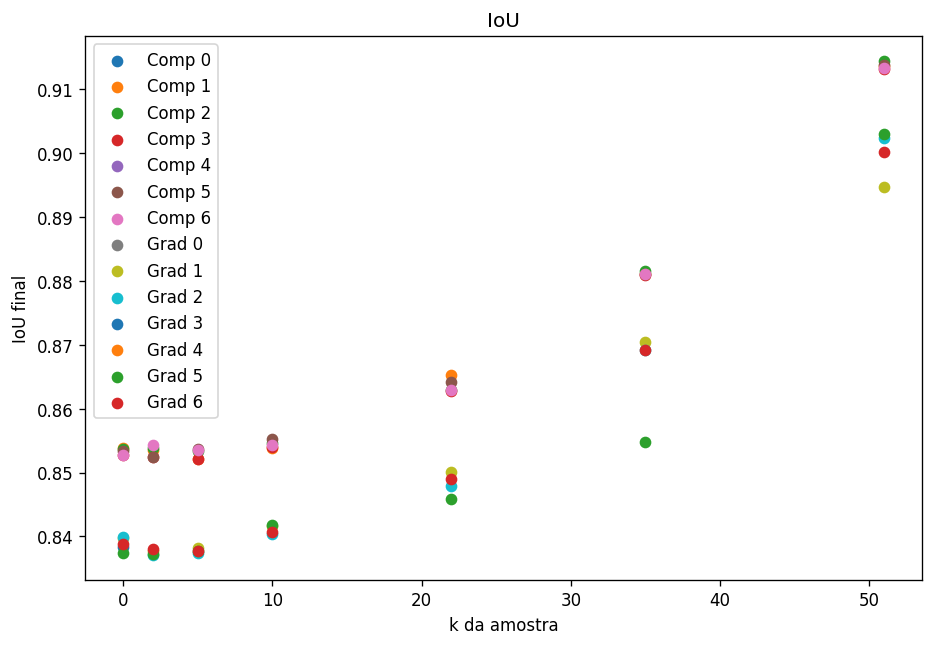

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(9,6),dpi=120)
ax.set(title="IoU",xlabel="k da amostra", ylabel="IoU final")
for i in range(7):
  ax.scatter(d[(d["tipo"]=="comp") & (d['n_treino']==i)]["k"],d[(d["tipo"]=="comp") & (d['n_treino']==i)]["IOU"],label=f"Comp {i}")
for i in range(7):
  ax.scatter(d[(d["tipo"]=="gradcomp") & (d['n_treino']==i)]["k"],d[(d["tipo"]=="gradcomp") & (d['n_treino']==i)]["IOU"],label=f"Grad {i}")
ax.legend(loc="upper left")

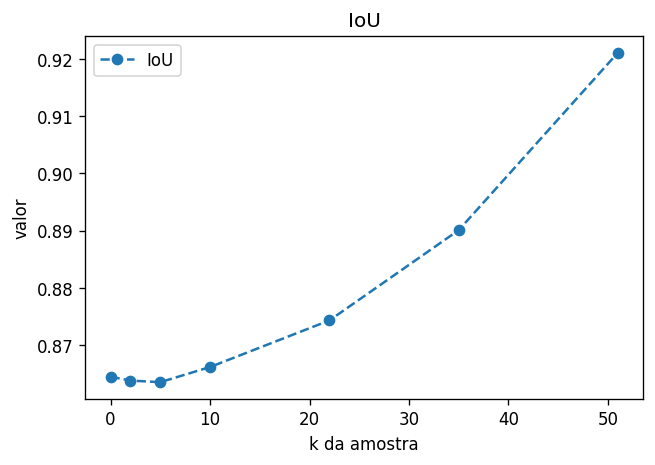

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,4),dpi=120)
ax.set(title="IoU",xlabel="k da amostra", ylabel="valor")
# for i in range(7):
i=11
ax.plot(d[(d["tipo"]=="semval") & (d['n_treino']==i)]["k"],d[(d["tipo"]=="semval") & (d['n_treino']==i)]["IOU"],'--o',label=f"IoU")
# for i in range(7):
#   ax.plot(d[(d["tipo"]=="gradcomp") & (d['n_treino']==i)]["k"],d[(d["tipo"]=="gradcomp") & (d['n_treino']==i)]["IOU"],'--o',label=f"Grad {i}")
ax.legend(loc="upper left")